<h1 style = "color:Green">Crypto API Web Scraping

<h2 style = "color:Red">API set-up

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


In [9]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0a0529c6-a14f-4111-927b-6cc0b6b76056',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-11T12:01:47.623Z', 'error_code': 0, 'error_message': None, 'elapsed': 84, 'credit_count': 25, 'notice': None, 'total_count': 10254}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10328, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [2]:
import pandas as pd


In [11]:
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-07-11T12:01:47.623Z           0          None       84            25   

  notice  total_count  
0   None        10254

In [12]:
pd.json_normalize(data['data'])

id               name  symbol               slug  num_market_pairs  \
0         1            Bitcoin     BTC            bitcoin             10328   
1      1027           Ethereum     ETH           ethereum              7103   
2       825             Tether    USDT             tether             56640   
3      1839                BNB     BNB                bnb              1493   
4      3408           USD Coin    USDC           usd-coin             13267   
...     ...                ...     ...                ...               ...   
4995  27152            Ceo Moo  CEOMOO            ceo-moo                 1   
4996  13672           Basilisk     BSX           basilisk                 2   
4997  21202             ReadFi    $RDF             readfi                 3   
4998  17054       Comb Finance    COMB       comb-finance                19   
4999  16035  Crypto Fight Club   FIGHT  crypto-fight-club                 8   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2018-10-08T00:00:00.000Z   
...                        ...   
4995  2023-06-22T05:15:35.000Z   
4996  2021-11-01T10:31:46.000Z   
4997  2022-08-02T23:57:39.000Z   
4998  2022-01-10T04:54:43.000Z   
4999  2021-12-14T07:53:39.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [medium-of-exchange, stablecoin, asset-backed-...           NaN   
...                                                 ...           ...   
4995                                            [memes]  1.000000e+14   
4996                                                 []           NaN   
4997                                                 []  1.000000e+08   
4998                                 [fantom-ecosystem]  2.300000e+08   
4999                                                 []  1.000000e+09   

      circulating_supply        total_supply  ...  quote.USD.market_cap  \
0           1.942656e+07            19426562  ...          5.907396e+11   
1           1.202082e+08    120208181.653349  ...          2.245971e+11   
2           8.336914e+10   85730981418.02774  ...          8.337101e+10   
3           1.558496e+08    155849578.706572  ...          3.834431e+10   
4           2.738265e+10  27382650571.598396  ...          2.738040e+10   
...                  ...                 ...  ...                   ...   
4995        0.000000e+00     100000000000000  ...          0.000000e+00   
4996        0.000000e+00                   0  ...          0.000000e+00   
4997        0.000000e+00           100000000  ...          0.000000e+00   
4998        0.000000e+00              129050  ...          0.000000e+00   
4999        0.000000e+00          1000000000  ...          0.000000e+00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            49.8975                        6.385861e+11   
1                            18.9708                        2.245971e+11   
2                             7.0421                        8.573290e+10   
3                             3.2388                        3.834431e+10   
4                             2.3128                        2.738040e+10   
...                              ...                                 ...   
4995                          0.0000                        8.747362e+04   
4996                          0.0000                        0.000000e+00   
4997                          0.0000                        2.502621e+05   
4998                          0.0000                        4.841967e+08   
4999                          0.0000 

<h2 style = "color:Red">Import pandas and expand the all rows and columns of the dataframe

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
pd.json_normalize(data['data'])

id               name symbol               slug  num_market_pairs  \
0         1            Bitcoin    BTC            bitcoin             10328   
1      1027           Ethereum    ETH           ethereum              7103   
2       825             Tether   USDT             tether             56635   
3      1839                BNB    BNB                bnb              1493   
4      3408           USD Coin   USDC           usd-coin             13263   
...     ...                ...    ...                ...               ...   
4995  22746               Tail   TAIL               tail                 4   
4996  16035  Crypto Fight Club  FIGHT  crypto-fight-club                 8   
4997   4695             Echoin     EC             echoin                 2   
4998   8788          CELEBPLUS  CELEB          celebplus                 3   
4999  16395  Kayserispor Token   KYSR  kayserispor-token                 1   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2018-10-08T00:00:00.000Z   
...                        ...   
4995  2022-11-22T03:40:14.000Z   
4996  2021-12-14T07:53:39.000Z   
4997  2019-09-23T00:00:00.000Z   
4998  2021-03-11T00:00:00.000Z   
4999  2021-12-23T05:57:10.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [medium-of-exchange, stablecoin, asset-backed-...           NaN   
...                                                 ...           ...   
4995                                                 []           NaN   
4996                                                 []  1.000000e+09   
4997                                                 []           NaN   
4998                                                 []  1.000000e+09   
4999                                                 []  1.000000e+06   

      circulating_supply        total_supply  infinite_supply  platform  \
0           1.942649e+07            19426493            False       NaN   
1           1.202082e+08    120208181.653349             True       NaN   
2           8.336914e+10   85730981418.02774             True       NaN   
3           1.558496e+08    155849594.759281            False       NaN   
4           2.739663e+10  27396630798.575436            False       NaN   
...                  ...                 ...              ...       ...   
4995        0.000000e+00    353907196.776086            False       NaN   
4996        0.000000e+00          1000000000            False       NaN   
4997        0.000000e+00          2000000000            False       NaN   
4998        0.000000e+00          1000000000            False       NaN   
4999        0.000000e+00              599529            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                               NaN                       NaN   
4996      4997                       283093960.0              1.643453e+05   
4997      4998                               NaN                       NaN   
4998      4999                       745389999.0              1.647855e+06   
4999      5000             

<h2 style = "color:Red">Add the current time column into the data frame

In [22]:

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)

df

id          name symbol          slug  num_market_pairs  \
0         1       Bitcoin    BTC       bitcoin             10328   
1      1027      Ethereum    ETH      ethereum              7103   
2       825        Tether   USDT        tether             56640   
3      1839           BNB    BNB           bnb              1493   
4      3408      USD Coin   USDC      usd-coin             13267   
...     ...           ...    ...           ...               ...   
4995   8534       Chintai   CHEX    chex-token                 4   
4996  13672      Basilisk    BSX      basilisk                 2   
4997  17213  Square Token   SQUA  square-token                13   
4998  17054  Comb Finance   COMB  comb-finance                19   
4999  21202        ReadFi   $RDF        readfi                 3   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2018-10-08T00:00:00.000Z   
...                        ...   
4995  2021-02-20T00:00:00.000Z   
4996  2021-11-01T10:31:46.000Z   
4997  2022-01-13T02:55:25.000Z   
4998  2022-01-10T04:54:43.000Z   
4999  2022-08-02T23:57:39.000Z   

                                                   tags   max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...   21000000.0   
1     [pos, smart-contracts, ethereum-ecosystem, coi...          NaN   
2     [payments, stablecoin, asset-backed-stablecoin...          NaN   
3     [marketplace, centralized-exchange, payments, ...          NaN   
4     [medium-of-exchange, stablecoin, asset-backed-...          NaN   
...                                                 ...          ...   
4995            [decentralized-exchange-dex-token, eos]  998842584.0   
4996                                                 []          NaN   
4997                                                 []    5000000.0   
4998                                 [fantom-ecosystem]  230000000.0   
4999                                                 []  100000000.0   

      circulating_supply        total_supply  infinite_supply  platform  \
0           1.942656e+07            19426562            False       NaN   
1           1.202082e+08    120208181.653349             True       NaN   
2           8.336914e+10   85730981418.02774             True       NaN   
3           1.558496e+08    155849578.706572            False       NaN   
4           2.738265e+10  27382650571.598396            False       NaN   
...                  ...                 ...              ...       ...   
4995        0.000000e+00           998842584            False       NaN   
4996        0.000000e+00                   0            False       NaN   
4997        0.000000e+00             5000000            False       NaN   
4998        0.000000e+00              129050            False       NaN   
4999        0.000000e+00           100000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      9.818225e+08              6.148556e+06   
4996      4997                               NaN                       NaN   
4997      4999                      2.068298e+06              1.849475e+06   
4998      5000                      3.478300e+04              7.406750e+04   
4999      4998                               NaN                       NaN   

      tvl_ratio              last_updated  quote.USD.price  \
0           NaN  2

<h2 style = "color:Red">Create the function for the automated fetching the data

In [4]:

def api_runner():
   
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0a0529c6-a14f-4111-927b-6cc0b6b76056',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
    
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)

    df_append = pd.DataFrame(df2)
    df2 = pd.concat([df2, df_append])

<h2 style = "color:Red">Every minute function will call and maximum "333"
    

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner successfully completed")
    sleep(60) #wait for a minute then run again
    
exit()    

{'status': {'timestamp': '2023-07-11T15:42:52.353Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10259}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10329, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-07-11T15:43:53.857Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 10259}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10329, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

<h2 style = "color:Red">Create the function for the automated fetching the data and store it in the "CSV" file

In [4]:
def api_runner():
   
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0a0529c6-a14f-4111-927b-6cc0b6b76056',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
    
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    
   #Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
    df

    if not os.path.isfile(r'C:\Users\shaik\OneDrive\Desktop\Courses\Data_Science\Alex_The_Analyst\WebScrapings\CriptoAPI\FetchedData\API.csv'):
        df.to_csv(r'C:\Users\shaik\OneDrive\Desktop\Courses\Data_Science\Alex_The_Analyst\WebScrapings\CriptoAPI\FetchedData\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\shaik\OneDrive\Desktop\Courses\Data_Science\Alex_The_Analyst\WebScrapings\CriptoAPI\FetchedData\API.csv', mode='a', header=False)

In [5]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner successfully completed")
    sleep(60) #wait for a minute then run again
    
exit()  

{'status': {'timestamp': '2023-07-11T15:46:29.614Z', 'error_code': 0, 'error_message': None, 'elapsed': 44, 'credit_count': 1, 'notice': None, 'total_count': 10259}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10329, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2023-07-11T15:47:30.434Z', 'error_code': 0, 'error_message': None, 'elapsed': 98, 'credit_count': 1, 'notice': None, 'total_count': 10259}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10329, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

<h2 style = "color:Red">Print the digits upto the 5 decimal point

In [ ]:
pd.set_option('display.float_format', lambda x: '%5f' %x)

In [6]:
df

id             name symbol             slug  num_market_pairs  \
0      1          Bitcoin    BTC          bitcoin             10329   
1   1027         Ethereum    ETH         ethereum              7104   
2    825           Tether   USDT           tether             56650   
3   1839              BNB    BNB              bnb              1493   
4   3408         USD Coin   USDC         usd-coin             13274   
5     52              XRP    XRP              xrp               979   
6   2010          Cardano    ADA          cardano               862   
7     74         Dogecoin   DOGE         dogecoin               740   
8   5426           Solana    SOL           solana               484   
9      2         Litecoin    LTC         litecoin               942   
10  1958             TRON    TRX             tron               785   
11  3890          Polygon  MATIC          polygon               769   
12  6636         Polkadot    DOT     polkadot-new               528   
13  1831     Bitcoin Cash    BCH     bitcoin-cash               724   
14  3717  Wrapped Bitcoin   WBTC  wrapped-bitcoin              1285   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2013-04-28T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2019-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2019-01-30T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
9         [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   
10  [media, payments, tron-ecosystem, sec-security...           NaN   
11  [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14  [medium-of-exchange, defi, wrapped-tokens, fan...           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.942671e+07  1.942671e+07            False       NaN         1   
1         1.202082e+08  1.202082e+08             True       NaN         2   
2         8.336914e+10  8.573098e+10             True       NaN         3   
3         1.558495e+08  1.558495e+08            False       NaN         4   
4         2.737384e+10  2.737384e+10            False       NaN         5   
5         5.254409e+10  9.998862e+10            False       NaN         6   
6         3.496613e+10  3.596797e+10            False       NaN         7   
7         1.401296e+11  1.401296e+11             True       NaN         8   
8         4.026536e+08  5.520829e+08             True       NaN         9   
9         7.333808e+07  8.400000e+07            False       NaN        10   
10        8.982334e+10  8.982340e+10             True       NaN        11   
11        9.319469e+09  1.000000e+10            False       NaN        12   
12        1.203523e+09  1.333002e+09             True       NaN        13   
13        1.944572e+07  1.944572e+07            False       NaN        14   
14        1.576253e+05  1.576253e+05            False       NaN 

<h2 style = "color:Red">Grouping the data using name column and calculate the mean value of it

In [7]:


df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                         
Bitcoin                             0.200303                      0.975529   
Ethereum                           -0.055303                      0.058712   
Tether                             -0.011621                      0.000566   
BNB                                -0.063680                      0.904732   
USD Coin                           -0.014046                     -0.000495   
XRP                                -0.050114                      0.301385   
Cardano                            -0.392255                      1.102755   
Dogecoin                           -0.211512                     -0.026519   
Solana                             -0.780711                      4.315390   
Litecoin                           -0.824569                      1.385336   
TRON                                0.044532                     -0.406974   
Polygon                            -0.378597                      3.831415   
Polkadot                           -0.151343                      0.829760   
Bitcoin Cash                       -0.011074                     -0.868917   
Wrapped Bitcoin                     0.298929                     11.433695   

                 quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                         
Bitcoin                            -1.084649                     18.739470   
Ethereum                           -4.074297                      7.421247   
Tether                             -0.012797                     -0.057631   
BNB                                 1.392544                      5.110249   
USD Coin                            0.008580                     -0.025950   
XRP                                -2.093043                     -6.667632   
Cardano                            -0.923961                      9.740672   
Dogecoin                           -8.005696                      5.622458   
Solana                             12.046682                     44.479496   
Litecoin                           -9.782310                     24.812594   
TRON                               -0.826109                     11.553699   
Polygon                             5.960187                     19.841015   
Polkadot                           -5.239842                     15.609003   
Bitcoin Cash                       -2.001820                    168.145679   
Wrapped Bitcoin                    -1.363140                     18.577286   

                 quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                         
Bitcoin                             16.182642                      2.159157  
Ethereum                             5.918681                     -2.338664  
Tether                              -0.044053                     -0.053440  
BNB                                -19.082041                    -22.699980  
USD Coin                             0.001075                      0.024336  
XRP                                 11.317360                     -5.756664  
Cardano                            -19.359513                    -27.631003  
Dogecoin                            -9.001580                    -21.270430  
Solana                               8.380018                     -6.404366  
Litecoin                            22.900112                      4.930140  
TRON                                12.562345                     19.266712  
Polygon                            -11.439688                    -33.181638  
Polkadot                            -1.547108                    -19.407641  
Bitcoin Cash                       141.570921                    112.992484  
Wrapped Bitcoin                     15.858739                      1.805236

<h2 style = "color:Red">Create the stack of the data frame

In [8]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h       0.200303
                 quote.USD.percent_change_24h      0.975529
                 quote.USD.percent_change_7d      -1.084649
                 quote.USD.percent_change_30d     18.739470
                 quote.USD.percent_change_60d     16.182642
                 quote.USD.percent_change_90d      2.159157
Ethereum         quote.USD.percent_change_1h      -0.055303
                 quote.USD.percent_change_24h      0.058712
                 quote.USD.percent_change_7d      -4.074297
                 quote.USD.percent_change_30d      7.421247
                 quote.USD.percent_change_60d      5.918681
                 quote.USD.percent_change_90d     -2.338664
Tether           quote.USD.percent_change_1h      -0.011621
                 quote.USD.percent_change_24h      0.000566
                 quote.USD.percent_change_7d      -0.012797
                 quote.USD.percent_change_30d     -0.0

In [13]:
type(df3)

pandas.core.frame.DataFrame

In [14]:
type(df4)

pandas.core.series.Series

<h2 style = "color:Red">Convert series(stack) into data frame 

In [9]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin         quote.USD.percent_change_1h     0.200303
                quote.USD.percent_change_24h    0.975529
                quote.USD.percent_change_7d    -1.084649
                quote.USD.percent_change_30d   18.739470
                quote.USD.percent_change_60d   16.182642
                quote.USD.percent_change_90d    2.159157
Ethereum        quote.USD.percent_change_1h    -0.055303
                quote.USD.percent_change_24h    0.058712
                quote.USD.percent_change_7d    -4.074297
                quote.USD.percent_change_30d    7.421247
                quote.USD.percent_change_60d    5.918681
                quote.USD.percent_change_90d   -2.338664
Tether          quote.USD.percent_change_1h    -0.011621
                quote.USD.percent_change_24h    0.000566
                quote.USD.percent_change_7d    -0.012797
                quote.USD.percent_change_30d   -0.057631
                quote.USD.percent_change_60d   -0.044053
                quote.USD.percent_change_90d   -0.053440
BNB             quote.USD.percent_change_1h    -0.063680
                quote.USD.percent_change_24h    0.904732
                quote.USD.percent_change_7d     1.392544
                quote.USD.percent_change_30d    5.110249
                quote.USD.percent_change_60d  -19.082041
                quote.USD.percent_change_90d  -22.699980
USD Coin        quote.USD.percent_change_1h    -0.014046
                quote.USD.percent_change_24h   -0.000495
                quote.USD.percent_change_7d     0.008580
                quote.USD.percent_change_30d   -0.025950
                quote.USD.percent_change_60d    0.001075
                quote.USD.percent_change_90d    0.024336
XRP             quote.USD.percent_change_1h    -0.050114
                quote.USD.percent_change_24h    0.301385
                quote.USD.percent_change_7d    -2.093043
                quote.USD.percent_change_30d   -6.667632
                quote.USD.percent_change_60d   11.317360
                quote.USD.percent_change_90d   -5.756664
Cardano         quote.USD.percent_change_1h    -0.392255
                quote.USD.percent_change_24h    1.102755
                quote.USD.percent_change_7d    -0.923961
                quote.USD.percent_change_30d    9.740672
                quote.USD.percent_change_60d  -19.359513
                quote.USD.percent_change_90d  -27.631003
Dogecoin        quote.USD.percent_change_1h    -0.211512
                quote.USD.percent_change_24h   -0.026519
                quote.USD.percent_change_7d    -8.005696
                quote.USD.percent_change_30d    5.622458
                quote.USD.percent_change_60d   -9.001580
                quote.USD.percent_change_90d  -21.270430
Solana          quote.USD.percent_change_1h    -0.780711
                quote.USD.percent_change_24h    4.315390
                quote.USD.percent_change_7d    12.046682
                quote.USD.percent_change_30d   44.479496
                quote.USD.percent_change_60d    8.380018
                quote.USD.percent_change_90d   -6.404366
Litecoin        quote.USD.percent_change_1h    -0.824569
                quote.USD.percent_change_24h    1.385336
                quote.USD.percent_change_7d    -9.782310
                quote.USD.percent_change_30d   24.812594
                quote.USD.percent_change_60d   22.900112
                quote.USD.percent_change_90d    4.930140
TRON            quote.USD.percent_change_1h     0.044532
                quote.USD.percent_change_24h   -0.406974
                quote.USD.percent_change_7d    -0.826109
                quote.USD.percent_change_30d   11.553699
                quote.USD.percent_change_60d   12.562345
                quote.USD.percent_change_90d   19.266712
Polygon         quote.USD.percent_change_1h    -0.378597
                quote.USD.percent_change_24h    3.831415
                quote.USD.percent_change_7d     5.960187
   

<h2 style = "color:Red">Insert and reset the index

In [ ]:
df5.count()

In [ ]:
index = pd.Index(range(90))

df6 = df5.set_index(index)

df6

In [10]:
df6 = df5.reset_index()

df6

name                       level_1      values
0           Bitcoin   quote.USD.percent_change_1h    0.200303
1           Bitcoin  quote.USD.percent_change_24h    0.975529
2           Bitcoin   quote.USD.percent_change_7d   -1.084649
3           Bitcoin  quote.USD.percent_change_30d   18.739470
4           Bitcoin  quote.USD.percent_change_60d   16.182642
5           Bitcoin  quote.USD.percent_change_90d    2.159157
6          Ethereum   quote.USD.percent_change_1h   -0.055303
7          Ethereum  quote.USD.percent_change_24h    0.058712
8          Ethereum   quote.USD.percent_change_7d   -4.074297
9          Ethereum  quote.USD.percent_change_30d    7.421247
10         Ethereum  quote.USD.percent_change_60d    5.918681
11         Ethereum  quote.USD.percent_change_90d   -2.338664
12           Tether   quote.USD.percent_change_1h   -0.011621
13           Tether  quote.USD.percent_change_24h    0.000566
14           Tether   quote.USD.percent_change_7d   -0.012797
15           Tether  quote.USD.percent_change_30d   -0.057631
16           Tether  quote.USD.percent_change_60d   -0.044053
17           Tether  quote.USD.percent_change_90d   -0.053440
18              BNB   quote.USD.percent_change_1h   -0.063680
19              BNB  quote.USD.percent_change_24h    0.904732
20              BNB   quote.USD.percent_change_7d    1.392544
21              BNB  quote.USD.percent_change_30d    5.110249
22              BNB  quote.USD.percent_change_60d  -19.082041
23              BNB  quote.USD.percent_change_90d  -22.699980
24         USD Coin   quote.USD.percent_change_1h   -0.014046
25         USD Coin  quote.USD.percent_change_24h   -0.000495
26         USD Coin   quote.USD.percent_change_7d    0.008580
27         USD Coin  quote.USD.percent_change_30d   -0.025950
28         USD Coin  quote.USD.percent_change_60d    0.001075
29         USD Coin  quote.USD.percent_change_90d    0.024336
30              XRP   quote.USD.percent_change_1h   -0.050114
31              XRP  quote.USD.percent_change_24h    0.301385
32              XRP   quote.USD.percent_change_7d   -2.093043
33              XRP  quote.USD.percent_change_30d   -6.667632
34              XRP  quote.USD.percent_change_60d   11.317360
35              XRP  quote.USD.percent_change_90d   -5.756664
36          Cardano   quote.USD.percent_change_1h   -0.392255
37          Cardano  quote.USD.percent_change_24h    1.102755
38          Cardano   quote.USD.percent_change_7d   -0.923961
39          Cardano  quote.USD.percent_change_30d    9.740672
40          Cardano  quote.USD.percent_change_60d  -19.359513
41          Cardano  quote.USD.percent_change_90d  -27.631003
42         Dogecoin   quote.USD.percent_change_1h   -0.211512
43         Dogecoin  quote.USD.percent_change_24h   -0.026519
44         Dogecoin   quote.USD.percent_change_7d   -8.005696
45         Dogecoin  quote.USD.percent_change_30d    5.622458
46         Dogecoin  quote.USD.percent_change_60d   -9.001580
47         Dogecoin  quote.USD.percent_change_90d  -21.270430
48           Solana   quote.USD.percent_change_1h   -0.780711
49           Solana  quote.USD.percent_change_24h    4.315390
50           Solana   quote.USD.percent_change_7d   12.046682
51           Solana  quote.USD.percent_change_30d   44.479496
52           Solana  quote.USD.percent_change_60d    8.380018
53           Solana  quote.USD.percent_change_90d   -6.404366
54         Litecoin   quote.USD.percent_change_1h   -0.824569
55         Litecoin  quote.USD.percent_change_24h    1.385336
56         Litecoin   quote.USD.percent_change_7d   -9.782310
57         Litecoin  quote.USD.percent_change_30d   24.812594
58         Litecoin  quote.USD.percent_change_60d   22.900112
59         Litecoin  quote.USD.percent_change_90d    4.930140
60             TRON   quote.USD.percent_change_1h    0.044532
61             TRON  quote.USD.percent_change_24h   -0.406974
62             TRON   quote.USD.percent_change_7d   -0.826109
63             TRON  quote.USD.percent_change_3

<h2 style = "color:Red">Change the name of the column

In [11]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7   

name                percent_change      values
0           Bitcoin   quote.USD.percent_change_1h    0.200303
1           Bitcoin  quote.USD.percent_change_24h    0.975529
2           Bitcoin   quote.USD.percent_change_7d   -1.084649
3           Bitcoin  quote.USD.percent_change_30d   18.739470
4           Bitcoin  quote.USD.percent_change_60d   16.182642
5           Bitcoin  quote.USD.percent_change_90d    2.159157
6          Ethereum   quote.USD.percent_change_1h   -0.055303
7          Ethereum  quote.USD.percent_change_24h    0.058712
8          Ethereum   quote.USD.percent_change_7d   -4.074297
9          Ethereum  quote.USD.percent_change_30d    7.421247
10         Ethereum  quote.USD.percent_change_60d    5.918681
11         Ethereum  quote.USD.percent_change_90d   -2.338664
12           Tether   quote.USD.percent_change_1h   -0.011621
13           Tether  quote.USD.percent_change_24h    0.000566
14           Tether   quote.USD.percent_change_7d   -0.012797
15           Tether  quote.USD.percent_change_30d   -0.057631
16           Tether  quote.USD.percent_change_60d   -0.044053
17           Tether  quote.USD.percent_change_90d   -0.053440
18              BNB   quote.USD.percent_change_1h   -0.063680
19              BNB  quote.USD.percent_change_24h    0.904732
20              BNB   quote.USD.percent_change_7d    1.392544
21              BNB  quote.USD.percent_change_30d    5.110249
22              BNB  quote.USD.percent_change_60d  -19.082041
23              BNB  quote.USD.percent_change_90d  -22.699980
24         USD Coin   quote.USD.percent_change_1h   -0.014046
25         USD Coin  quote.USD.percent_change_24h   -0.000495
26         USD Coin   quote.USD.percent_change_7d    0.008580
27         USD Coin  quote.USD.percent_change_30d   -0.025950
28         USD Coin  quote.USD.percent_change_60d    0.001075
29         USD Coin  quote.USD.percent_change_90d    0.024336
30              XRP   quote.USD.percent_change_1h   -0.050114
31              XRP  quote.USD.percent_change_24h    0.301385
32              XRP   quote.USD.percent_change_7d   -2.093043
33              XRP  quote.USD.percent_change_30d   -6.667632
34              XRP  quote.USD.percent_change_60d   11.317360
35              XRP  quote.USD.percent_change_90d   -5.756664
36          Cardano   quote.USD.percent_change_1h   -0.392255
37          Cardano  quote.USD.percent_change_24h    1.102755
38          Cardano   quote.USD.percent_change_7d   -0.923961
39          Cardano  quote.USD.percent_change_30d    9.740672
40          Cardano  quote.USD.percent_change_60d  -19.359513
41          Cardano  quote.USD.percent_change_90d  -27.631003
42         Dogecoin   quote.USD.percent_change_1h   -0.211512
43         Dogecoin  quote.USD.percent_change_24h   -0.026519
44         Dogecoin   quote.USD.percent_change_7d   -8.005696
45         Dogecoin  quote.USD.percent_change_30d    5.622458
46         Dogecoin  quote.USD.percent_change_60d   -9.001580
47         Dogecoin  quote.USD.percent_change_90d  -21.270430
48           Solana   quote.USD.percent_change_1h   -0.780711
49           Solana  quote.USD.percent_change_24h    4.315390
50           Solana   quote.USD.percent_change_7d   12.046682
51           Solana  quote.USD.percent_change_30d   44.479496
52           Solana  quote.USD.percent_change_60d    8.380018
53           Solana  quote.USD.percent_change_90d   -6.404366
54         Litecoin   quote.USD.percent_change_1h   -0.824569
55         Litecoin  quote.USD.percent_change_24h    1.385336
56         Litecoin   quote.USD.percent_change_7d   -9.782310
57         Litecoin  quote.USD.percent_change_30d   24.812594
58         Litecoin  quote.USD.percent_change_60d   22.900112
59         Litecoin  quote.USD.percent_change_90d    4.930140
60             TRON   quote.USD.percent_change_1h    0.044532
61             TRON  quote.USD.percent_change_24h   -0.406974
62             TRON   quote.USD.percent_change_7d   -0.826109
63             TRON  quote.USD.percent_change_3

<h2 style = "color:Red">Plot the graph

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

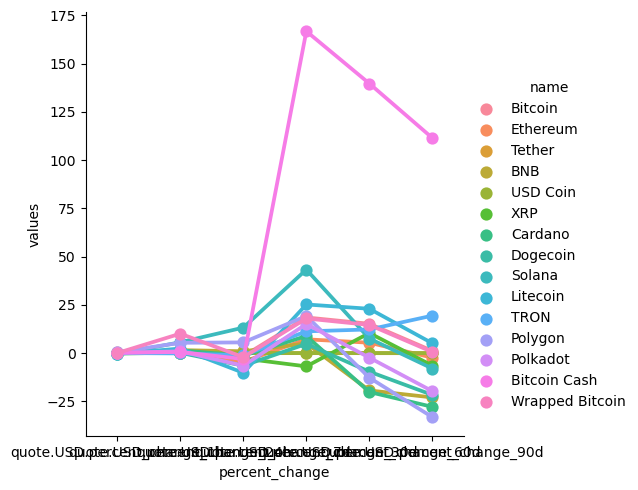

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')



In [31]:
df7

name                percent_change     values
0           Bitcoin   quote.USD.percent_change_1h   0.400552
1           Bitcoin  quote.USD.percent_change_24h   0.737226
2           Bitcoin   quote.USD.percent_change_7d  -1.592530
3           Bitcoin  quote.USD.percent_change_30d  18.472677
4           Bitcoin  quote.USD.percent_change_60d  15.196407
5           Bitcoin  quote.USD.percent_change_90d   1.176405
6          Ethereum   quote.USD.percent_change_1h   0.178565
7          Ethereum  quote.USD.percent_change_24h   0.128852
8          Ethereum   quote.USD.percent_change_7d  -4.469604
9          Ethereum  quote.USD.percent_change_30d   7.149921
10         Ethereum  quote.USD.percent_change_60d   5.381794
11         Ethereum  quote.USD.percent_change_90d  -2.356595
12           Tether   quote.USD.percent_change_1h  -0.005181
13           Tether  quote.USD.percent_change_24h   0.007094
14           Tether   quote.USD.percent_change_7d  -0.014649
15           Tether  quote.USD.percent_change_30d  -0.017176
16           Tether  quote.USD.percent_change_60d  -0.030004
17           Tether  quote.USD.percent_change_90d  -0.059336
18              BNB   quote.USD.percent_change_1h   0.151582
19              BNB  quote.USD.percent_change_24h   1.530057
20              BNB   quote.USD.percent_change_7d   0.951277
21              BNB  quote.USD.percent_change_30d   5.021963
22              BNB  quote.USD.percent_change_60d -19.343826
23              BNB  quote.USD.percent_change_90d -22.967908
24         USD Coin   quote.USD.percent_change_1h   0.002810
25         USD Coin  quote.USD.percent_change_24h   0.011736
26         USD Coin   quote.USD.percent_change_7d   0.010597
27         USD Coin  quote.USD.percent_change_30d   0.030725
28         USD Coin  quote.USD.percent_change_60d   0.022928
29         USD Coin  quote.USD.percent_change_90d   0.019995
30              XRP   quote.USD.percent_change_1h  -0.167115
31              XRP  quote.USD.percent_change_24h   0.197047
32              XRP   quote.USD.percent_change_7d  -2.774050
33              XRP  quote.USD.percent_change_30d  -6.879896
34              XRP  quote.USD.percent_change_60d  10.409626
35              XRP  quote.USD.percent_change_90d  -6.477993
36          Cardano   quote.USD.percent_change_1h  -0.226604
37          Cardano  quote.USD.percent_change_24h   1.460468
38          Cardano   quote.USD.percent_change_7d  -1.357439
39          Cardano  quote.USD.percent_change_30d   8.856490
40          Cardano  quote.USD.percent_change_60d -20.173110
41          Cardano  quote.USD.percent_change_90d -27.847187
42         Dogecoin   quote.USD.percent_change_1h  -0.153721
43         Dogecoin  quote.USD.percent_change_24h   0.159709
44         Dogecoin   quote.USD.percent_change_7d  -6.542711
45         Dogecoin  quote.USD.percent_change_30d   4.784418
46         Dogecoin  quote.USD.percent_change_60d  -9.609913
47         Dogecoin  quote.USD.percent_change_90d -21.667743
48           Solana   quote.USD.percent_change_1h  -0.504143
49           Solana  quote.USD.percent_change_24h   5.614520
50           Solana   quote.USD.percent_change_7d  13.208508
51           Solana  quote.USD.percent_change_30d  43.283557
52           Solana  quote.USD.percent_change_60d   7.539457
53           Solana  quote.USD.percent_change_90d  -7.992130
54         Litecoin   quote.USD.percent_change_1h  -0.369217
55         Litecoin  quote.USD.percent_change_24h   2.367413
56         Litecoin   quote.USD.percent_change_7d -10.210694
57         Litecoin  quote.USD.percent_change_30d  25.198130
58         Litecoin  quote.USD.percent_change_60d  22.976415
59         Litecoin  quote.USD.percent_change_90d   5.087678
60             TRON   quote.USD.percent_change_1h   0.028032
61             TRON  quote.USD.percent_change_24h  -0.171513
62             TRON   quote.USD.percent_change_7d  -1.143613
63             TRON  quote.USD.percent_change_30d  11.282832
64             TRON  quote.USD.percent_change_60d 

<h2 style = "color:Red">Sorter the name length

In [12]:
df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])

0                               1h
1     quote.USD.percent_change_24h
2      quote.USD.percent_change_7d
3     quote.USD.percent_change_30d
4     quote.USD.percent_change_60d
5     quote.USD.percent_change_90d
6                               1h
7     quote.USD.percent_change_24h
8      quote.USD.percent_change_7d
9     quote.USD.percent_change_30d
10    quote.USD.percent_change_60d
11    quote.USD.percent_change_90d
12                              1h
13    quote.USD.percent_change_24h
14     quote.USD.percent_change_7d
15    quote.USD.percent_change_30d
16    quote.USD.percent_change_60d
17    quote.USD.percent_change_90d
18                              1h
19    quote.USD.percent_change_24h
20     quote.USD.percent_change_7d
21    quote.USD.percent_change_30d
22    quote.USD.percent_change_60d
23    quote.USD.percent_change_90d
24                              1h
25    quote.USD.percent_change_24h
26     quote.USD.percent_change_7d
27    quote.USD.percent_change_30d
28    quote.USD.perc

In [13]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

name percent_change      values
0           Bitcoin             1h    0.200303
1           Bitcoin            24h    0.975529
2           Bitcoin             7d   -1.084649
3           Bitcoin            30d   18.739470
4           Bitcoin            60d   16.182642
5           Bitcoin            90d    2.159157
6          Ethereum             1h   -0.055303
7          Ethereum            24h    0.058712
8          Ethereum             7d   -4.074297
9          Ethereum            30d    7.421247
10         Ethereum            60d    5.918681
11         Ethereum            90d   -2.338664
12           Tether             1h   -0.011621
13           Tether            24h    0.000566
14           Tether             7d   -0.012797
15           Tether            30d   -0.057631
16           Tether            60d   -0.044053
17           Tether            90d   -0.053440
18              BNB             1h   -0.063680
19              BNB            24h    0.904732
20              BNB             7d    1.392544
21              BNB            30d    5.110249
22              BNB            60d  -19.082041
23              BNB            90d  -22.699980
24         USD Coin             1h   -0.014046
25         USD Coin            24h   -0.000495
26         USD Coin             7d    0.008580
27         USD Coin            30d   -0.025950
28         USD Coin            60d    0.001075
29         USD Coin            90d    0.024336
30              XRP             1h   -0.050114
31              XRP            24h    0.301385
32              XRP             7d   -2.093043
33              XRP            30d   -6.667632
34              XRP            60d   11.317360
35              XRP            90d   -5.756664
36          Cardano             1h   -0.392255
37          Cardano            24h    1.102755
38          Cardano             7d   -0.923961
39          Cardano            30d    9.740672
40          Cardano            60d  -19.359513
41          Cardano            90d  -27.631003
42         Dogecoin             1h   -0.211512
43         Dogecoin            24h   -0.026519
44         Dogecoin             7d   -8.005696
45         Dogecoin            30d    5.622458
46         Dogecoin            60d   -9.001580
47         Dogecoin            90d  -21.270430
48           Solana             1h   -0.780711
49           Solana            24h    4.315390
50           Solana             7d   12.046682
51           Solana            30d   44.479496
52           Solana            60d    8.380018
53           Solana            90d   -6.404366
54         Litecoin             1h   -0.824569
55         Litecoin            24h    1.385336
56         Litecoin             7d   -9.782310
57         Litecoin            30d   24.812594
58         Litecoin            60d   22.900112
59         Litecoin            90d    4.930140
60             TRON             1h    0.044532
61             TRON            24h   -0.406974
62             TRON             7d   -0.826109
63             TRON            30d   11.553699
64             TRON            60d   12.562345
65             TRON            90d   19.266712
66          Polygon             1h   -0.378597
67          Polygon            24h    3.831415
68          Polygon             7d    5.960187
69          Polygon            30d   19.841015
70          Polygon            60d  -11.439688
71          Polygon            90d  -33.181638
72         Polkadot             1h   -0.151343
73         Polkadot            24h    0.829760
74         Polkadot             7d   -5.239842
75         Polkadot            30d   15.609003
76         Polkadot            60d   -1.547108
77         Polkadot            90d  -19.407641
78     Bitcoin Cash             1h   -0.011074
79     Bitcoin Cash            24h   -0.868917
80     Bitcoin Cash             7d   -2.001820
81     Bitcoin Cash            30d  168.145679
82     Bitcoin Cash            60d  141.570921
83     Bitcoin Cash            90d  112.992484
84  Wrapped Bitcoin 

<h2 style = "color:Red">Graphs values are more visible because of sorter name

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

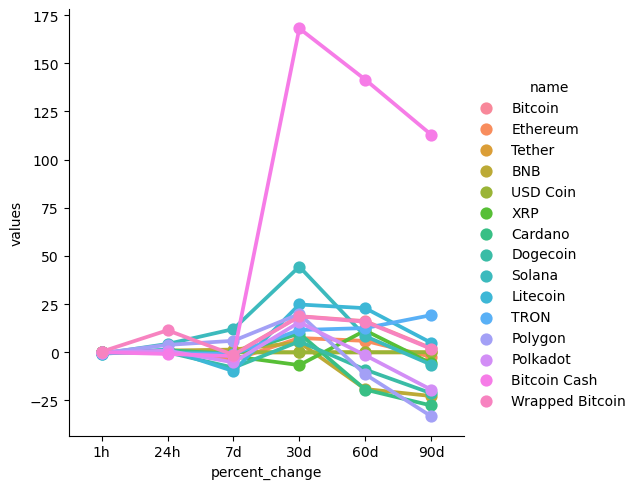

In [16]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [17]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]

df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                        timestamp
0  Bitcoin     30596.707733 2023-07-11 15:47:30.134507+00:00

In [18]:
sns.catplot(x='timestamp', y='quote.USD.price', data = df10)